#### Option 1: Use WebPlotDigitizer (Easier, Visual Tool)

Steps:

1. Go to https://apps.automeris.io/wpd/.

2. Upload the images.

3. Calibrate axes (X = time, Y = VA or Watts).

4. Trace curves for each:

 - Top graph: VA (Phases A, B, and total).

 - Bottom graph: Watts (Phases A, B).

5. Export the data as CSV files.

Once you have the CSVs, we’ll load them into Python.

C:\Users\hp\AppData\Local\Temp\ipykernel_8200\27717237.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


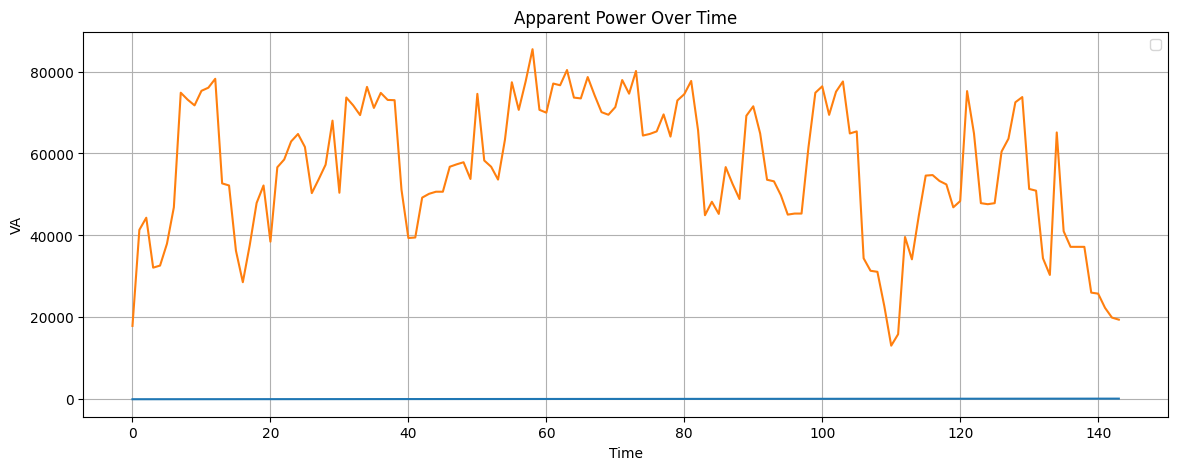

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load digitized CSV data
va_data = pd.read_csv(r"C:\Users\hp\Desktop\REG108S\Project\Measuerment\VA Total.csv")       # Contains Time, Phase_A, Phase_B, Total

# Plot Apparent Power
plt.figure(figsize=(14, 5))
plt.plot(va_data)
plt.title("Apparent Power Over Time")
plt.xlabel("Time")
plt.ylabel("VA")
plt.legend()
plt.grid(True)
plt.show()


#### Option 2: Extract Lines from Images in Python (Advanced)

This method uses code to automatically trace graph lines:

- Load image.

- Detect colored lines.

- Map pixel coordinates to time and power values.

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def imageProcess(image_path):
    
    # Load image of the top graph (VA graph)
    image = cv2.imread(image_path)

    # Convert to RGB for matplotlib and grayscale for processing
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection to find lines
    edges = cv2.Canny(gray, 50, 150)

    # Show original and edge-detected image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original VA Graph")
    plt.imshow(image_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Edge Detection (Canny)")
    plt.imshow(edges, cmap='gray')
    plt.axis("off")
    plt.tight_layout()
    plt.show()


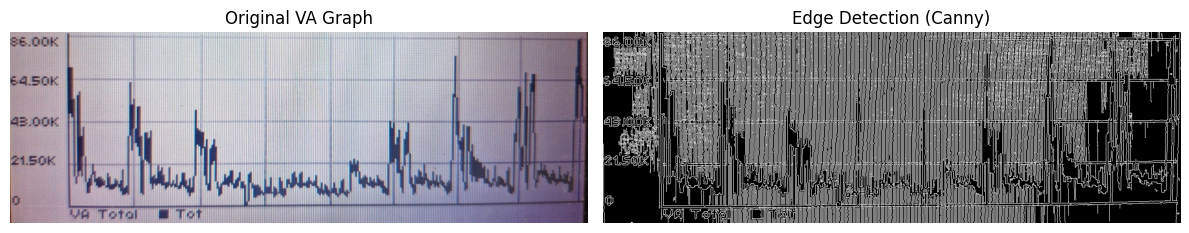

In [23]:
imageProcess(r"C:\Users\hp\Desktop\REG108S\Project\Measuerment\WhatsApp Image 2025-05-12 at 14.03.13_9e4ae29a.jpg")

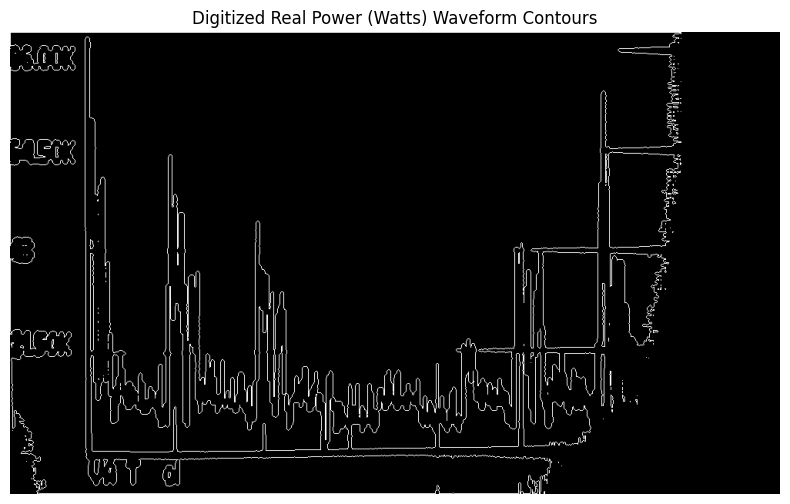

In [24]:
# Correct image path for the second original image (real power/wattage)
image_path = r"C:\Users\hp\Desktop\REG108S\Project\Measuerment\WhatsApp Image 2025-05-12 at 14.03.13_9e4ae29a.jpg"

# Load the image
img = cv2.imread(image_path)

# Resize for easier contour visualization
img_resized = cv2.resize(img, (1000, 600))

# Convert to grayscale
gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply binary threshold
_, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank canvas to draw contours
contour_img = np.zeros_like(gray)

# Draw contours
cv2.drawContours(contour_img, contours, -1, (255), 1)

# Display the result
plt.figure(figsize=(12, 6))
plt.imshow(contour_img, cmap='gray')
plt.title('Digitized Real Power (Watts) Waveform Contours')
plt.axis('off')
plt.show()
